In [1]:
import graphlab

sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

This non-commercial license of GraphLab Create is assigned to f2014053@pilani.bits-pilani.ac.in and will expire on May 26, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-06-01 11:15:44,602 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: /tmp/graphlab_server_1464759943.log


Finished parsing file /home/suyash/Washington Machine Learning Specialisation/Course 2 Regression/Week 1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.01286 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/suyash/Washington Machine Learning Specialisation/Course 2 Regression/Week 1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.014557 secs.

In [2]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [3]:
sales.show(view='Scatter Plot', x='CrimeRate', y='HousePrice')

Canvas is accessible via web browser at the URL: http://localhost:46772/index.html
Opening Canvas in default web browser.


In [4]:
crime_model = graphlab.linear_regression.create(sales,target='HousePrice', features = ['CrimeRate'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 99

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.023837     | 314982.574662      | 83468.940148  |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

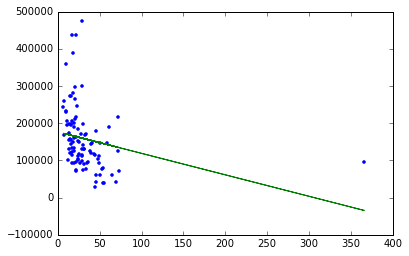

In [7]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',sales['CrimeRate'],crime_model.predict(sales),'-')

In [8]:
sales[sales['CrimeRate']==366.1]

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [9]:
sales_nooutlier = sales[sales['CrimeRate']!=366.1]

In [11]:
sales_nooutlier.show(view='Scatter Plot', x='CrimeRate', y = 'HousePrice')

Canvas is updated and available in a tab in the default browser.


In [12]:
crime_model_nooutlier = graphlab.linear_regression.create(sales_nooutlier, target='HousePrice', features = ['CrimeRate'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 98

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000401     | 315335.534886      | 78052.676125  |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

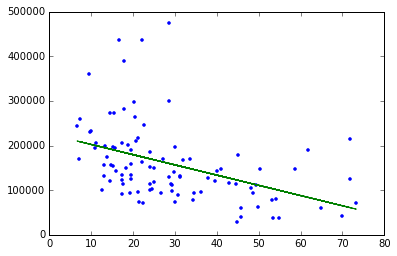

In [13]:
plt.plot(sales_nooutlier['CrimeRate'],sales_nooutlier['HousePrice'],'.',sales_nooutlier['CrimeRate'],crime_model_nooutlier.predict(sales_nooutlier),'-')